In [1]:
import xarray as xr
import os

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')

In [2]:
grd_path = os.path.join(data_dir,'analysis','interim','grd2_dV.nc')
grd = xr.open_dataset(grd_path)

<IPython.core.display.Javascript object>


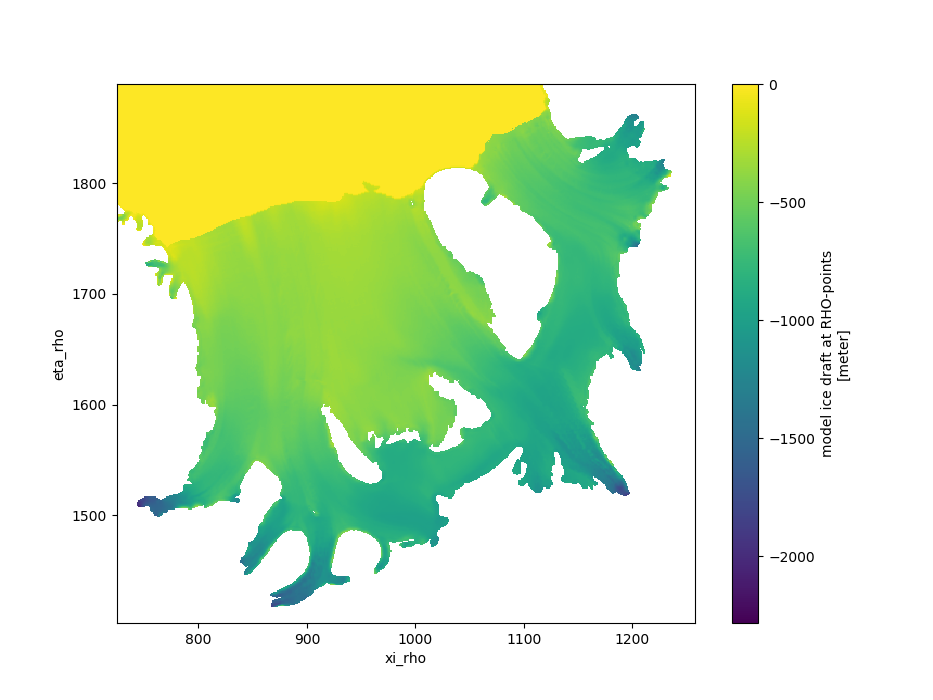

In [3]:
%matplotlib notebook
grd.zice.where(grd.mask_rho).plot(size=7)

In [2]:
# Amundsen
coords_amundsen = {'xi_rho':slice(520,760),'eta_rho':slice(950,1220),
          'xi_u': slice(520,759), 'eta_u': slice(950,1220),
          'xi_v': slice(520,760) , 'eta_v': slice(950,1219),
          'xi_psi': slice(520,759), 'eta_psi': slice(950,1219)}

coords_drygalski = {'xi_rho':slice(1500,1770),'eta_rho':slice(400,660),
          'xi_u':slice(1500,1769),'eta_u':slice(400,660),
          'xi_v':slice(1500,1770),'eta_v':slice(400,659),
          'xi_psi':slice(1500,1769),'eta_psi':slice(400,659)}

coords_filchner_ronne = {'xi_rho':slice(727,1256),'eta_rho':slice(1404,1883)}

In [5]:
def make_uvpsi_coors(coords):
    coords['xi_u']=slice(coords['xi_rho'].start,coords['xi_rho'].stop-1)
    coords['eta_u']=coords['eta_rho']
    coords['xi_v']=coords['xi_rho']
    coords['eta_v']=slice(coords['eta_rho'].start,coords['eta_rho'].stop-1)
    coords['xi_psi']=slice(coords['xi_rho'].start,coords['xi_rho'].stop-1)
    coords['eta_psi']=slice(coords['eta_rho'].start,coords['eta_rho'].stop-1)
    
    return coords

def subset(coords,name):
    
    coords = make_uvpsi_coors(coords)
    
    ds = xr.Dataset()

    for var,gt in [['m','rho']]:#,['zeta','rho'],['ubar','u'],['vbar','v'],
                   #['temp','rho'],['salt','rho'],['u','u'],['v','v']]:
        print(f'processing {var}')
        path = os.path.join(data_dir,'analysis','raw','waom2','ocean_avg_0538-0610_'+var+'.nc')
        da = xr.open_dataset(path)[var]
        da = da.isel({'xi_'+gt : coords['xi_'+gt], 'eta_'+gt : coords['eta_'+gt]})
        ds[var] = da

    print('processing grid')    
    grd_path = os.path.join(data_dir,'analysis','interim','grd2_dV.nc')
    grd = xr.open_dataset(grd_path).isel(coords)
    ds = ds.merge(grd)
    
    #out_path = os.path.join(data_dir,'analysis','processed',f'atom2_{name}.nc')
    out_path = os.path.join('~','raijin','short','gh9','oxr581','waom2',f'atom2_{name}.nc')
    print(f'writing to {out_path}')
    ds.to_netcdf(out_path)

In [6]:
#subset(coords_amundsen,'amundsen')
subset(coords_filchner_ronne,'filchnerRonne')

processing m


FileNotFoundError: [Errno 2] No such file or directory: b'/home/ubuntu/bigStick/antarctic_melting/data/analysis/raw/waom2/ocean_0538-0610_m.nc'